In [1]:
import pandas as pd
import geopandas as gpd

Import dataset of coordinates of all grocery stores that are currently registered with the Office of Finance as actuve businesses from at:https://data.lacity.org/Administration-Finance/Grocery-Stores/g986-7yf9.

In [2]:
grocery=pd.read_csv('Grocery_Stores.csv')
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LOCATION ACCOUNT #         1236 non-null   object 
 1   BUSINESS NAME              1236 non-null   object 
 2   DBA NAME                   1013 non-null   object 
 3   STREET ADDRESS             1236 non-null   object 
 4   CITY                       1236 non-null   object 
 5   ZIP CODE                   1236 non-null   object 
 6   LOCATION DESCRIPTION       1236 non-null   object 
 7   MAILING ADDRESS            614 non-null    object 
 8   MAILING CITY               613 non-null    object 
 9   MAILING ZIP CODE           614 non-null    object 
 10  NAICS                      1236 non-null   int64  
 11  PRIMARY NAICS DESCRIPTION  1236 non-null   object 
 12  COUNCIL DISTRICT           1236 non-null   int64  
 13  LOCATION START DATE        1231 non-null   objec

Get just the variables that we want so this is easier to work with.

In [3]:
grocery_variables = grocery[['LOCATION ACCOUNT #','BUSINESS NAME','DBA NAME','STREET ADDRESS', 'CITY', 'ZIP CODE', 'LOCATION']].copy()
grocery_variables.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION
0,0002754901-0002-3,MOISES CLEMENTE,THE REAL SNACK STORE,5526 AVALON BLVD,LOS ANGELES,90011-5116,"(33.9922, -118.2651)"
1,0002869486-0001-4,LETS WORK ALL INC,7-ELEVEN STORE 39763A,3079 N SAN FERNANDO ROAD,LOS ANGELES,90065-1410,"(34.1144, -118.2454)"
2,0002870509-0001-8,MAURA CALIXTO VELAZQUEZ,VELAZQUEZ MINI MARKET,8504 S BROADWAY,LOS ANGELES,90003-3335,"(33.9614, -118.2782)"
3,0002807581-0001-7,"BIG 6 HOLDINGS, INC.",NaN,550 S RAMPART BLVD,LOS ANGELES,90057-2602,"(34.0629, -118.281)"
4,0003320264-0001-8,STOP 7 MARKET INC,STOP 7 MARKET,600 E 7TH STREET,LOS ANGELES,90021-1436,"(34.0403, -118.2467)"


In order to convert this dataframe to a geodataframe, I must split the location information into seprate latitude and longitude variables. To do this, I'll split the locations into a new temporary dataframe called "coordinates" and then add this new data back into the original dataframe.

In [4]:
coordinates=grocery_variables["LOCATION"].str.split(",", n = 1, expand = True)
grocery_variables["latitude"]=coordinates[0]
grocery_variables["longitude"]=coordinates[1]
grocery_variables.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION,latitude,longitude
0,0002754901-0002-3,MOISES CLEMENTE,THE REAL SNACK STORE,5526 AVALON BLVD,LOS ANGELES,90011-5116,"(33.9922, -118.2651)",(33.9922,-118.2651)
1,0002869486-0001-4,LETS WORK ALL INC,7-ELEVEN STORE 39763A,3079 N SAN FERNANDO ROAD,LOS ANGELES,90065-1410,"(34.1144, -118.2454)",(34.1144,-118.2454)
2,0002870509-0001-8,MAURA CALIXTO VELAZQUEZ,VELAZQUEZ MINI MARKET,8504 S BROADWAY,LOS ANGELES,90003-3335,"(33.9614, -118.2782)",(33.9614,-118.2782)
3,0002807581-0001-7,"BIG 6 HOLDINGS, INC.",NaN,550 S RAMPART BLVD,LOS ANGELES,90057-2602,"(34.0629, -118.281)",(34.0629,-118.281)
4,0003320264-0001-8,STOP 7 MARKET INC,STOP 7 MARKET,600 E 7TH STREET,LOS ANGELES,90021-1436,"(34.0403, -118.2467)",(34.0403,-118.2467)


Now, I have to remove the parentheses from these two new variables (latitude and longitude) so that they're clean. I'll do this by replacing the open/close parentheses symbols with nothing.

In [5]:
grocery_variables['latitude'] = grocery_variables['latitude'].str.replace("(", "")
grocery_variables['longitude'] = grocery_variables['longitude'].str.replace(")", "")
grocery_variables

/tmp/ipykernel_440/282794873.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  grocery_variables['latitude'] = grocery_variables['latitude'].str.replace("(", "")
/tmp/ipykernel_440/282794873.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  grocery_variables['longitude'] = grocery_variables['longitude'].str.replace(")", "")


,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION,latitude,longitude
0,0002754901-0002-3,MOISES CLEMENTE,THE REAL SNACK STORE,5526 AVALON BLVD,LOS ANGELES,90011-5116,"(33.9922, -118.2651)",33.9922,-118.2651
1,0002869486-0001-4,LETS WORK ALL INC,7-ELEVEN STORE 39763A,3079 N SAN FERNANDO ROAD,LOS ANGELES,90065-1410,"(34.1144, -118.2454)",34.1144,-118.2454
2,0002870509-0001-8,MAURA CALIXTO VELAZQUEZ,VELAZQUEZ MINI MARKET,8504 S BROADWAY,LOS ANGELES,90003-3335,"(33.9614, -118.2782)",33.9614,-118.2782
3,0002807581-0001-7,"BIG 6 HOLDINGS, INC.",NaN,550 S RAMPART BLVD,LOS ANGELES,90057-2602,"(34.0629, -118.281)",34.0629,-118.281
4,0003320264-0001-8,STOP 7 MARKET INC,STOP 7 MARKET,600 E 7TH STREET,LOS ANGELES,90021-1436,"(34.0403, -118.2467)",34.0403,-118.2467
...,...,...,...,...,...,...,...,...,...
1231,0003346998-0001-1,12912 VENICE BLVD LLC,NaN,12912 VENICE BLVD,LOS ANGELES,90066-3555,"(33.9993, -118.4415)",33.9993,-118.4415
1232,0000298384-0002-5,JUNG YEOL BAEK CHO,POMONA MARKET,2747 LINCOLN PARK AVENUE,LOS ANGELES,90031-2428,"(34.0779, -118.2028)",34.0779,-118.2028
1233,0000295973-0001-6,LEON'S AEL INC,EDUARDO R LEON AND PAULINA M RINCON,7111 S MAIN STREET,LOS ANGELES,90003-2131,"(33.9754, -118.2739)",33.9754,-118.2739
1234,0003347061-0001-1,PANTALEON GARCIA,DAVID'S MINI MARKET,5430 Compton,Los Angeles,90011-4940,"(33.9936, 33.9936)",33.9936,33.9936


Perfect! We're now ready to convert the dataframe (grocery_variables) into a geodataframe (grocery_locations).

In [6]:
grocery_locations = gpd.GeoDataFrame(
    grocery_variables, geometry=gpd.points_from_xy(grocery_variables.longitude, grocery_variables.latitude))

<AxesSubplot: >

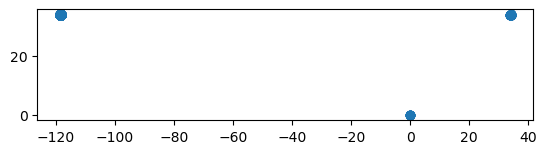

In [7]:
grocery_locations.plot()

Yikes! It looks like there's some underlying bad data displaying a couple of issues: places with coordinates 0,0; and places where the longitude is erroniously set to be the same as the latitude. To drop the rows that we don't have valid data for, I'll import a file with just the boundary of the City of LA and clip the grocery stop data to this mask.
First, I will open a geojson with all of the city boundaries and create a new geodataframe with just the boundary for the City of LA.

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<AxesSubplot: >

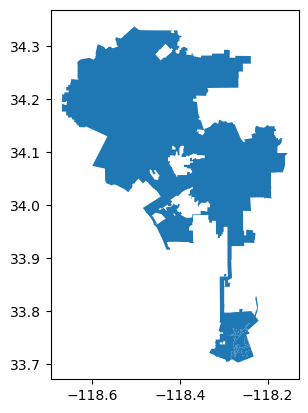

In [8]:
municipalities=gpd.read_file('City_Boundaries.geojson')
lacity=municipalities.query("CITY_NAME == 'Los Angeles'").copy()
lacity.plot()

Now, I'll clip the grocery store data. To do this, I fist have to set the CRS to match the CRS of the LA City geojson file.

In [9]:
grocery_locations=grocery_locations.set_crs(4326, allow_override=True)
grocery_clean = gpd.clip(grocery_locations, municipalities)
grocery_clean

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION,latitude,longitude,geometry
967,0002873447-0001-7,"LIM & LIM, INC.",THE PINK STORE,11320 MONA BLVD,LOS ANGELES,90059-,"(33.9315, -118.2307)",33.9315,-118.2307,POINT (-118.23070 33.93150)
656,0003033020-0001-1,JUAN IGNACIO ALVAREZ PASTOR,ANITAS MINI MART,11228 WILMINGTON AVENUE,LOS ANGELES,90059-1246,"(33.9326, -118.2388)",33.9326,-118.2388,POINT (-118.23880 33.93260)
1141,0003314624-0001-9,MARIA DE LOS ANGELES DIMAS ARAGON,OSIRIS MINI MART,11200 WILMINGTON AVENUE,LOS ANGELES,90059-1246,"(33.9333, -118.2387)",33.9333,-118.2387,POINT (-118.23870 33.93330)
623,0002565378-0001-6,JAIME NARCISO ENCARNACION,NARCISO'S MINI MART,11200 WILMINGTON AVENUE,LOS ANGELES,90059-1246,"(33.9334, -118.239)",33.9334,-118.239,POINT (-118.23900 33.93340)
780,0000291939-0001-0,HUGO A PEREZ,NaN,11200 WILMINGTON AVENUE,LOS ANGELES,90059-1246,"(33.9334, -118.239)",33.9334,-118.239,POINT (-118.23900 33.93340)
...,...,...,...,...,...,...,...,...,...,...
1050,0002849771-0002-8,R & S SHARMA INC,7-ELEVEN STORE 39832A,1770 N HIGHLAND AVENUE SUITE #D-E,LOS ANGELES,90028-4406,"(34.1036, -118.3384)",34.1036,-118.3384,POINT (-118.33840 34.10360)
438,0002669649-0001-9,HOLLYWOOD SUPER MARKET INC,YUCCA SUPERMARKET,1815 N CAHUENGA BLVD,LOS ANGELES,90028-5001,"(34.1043, -118.3299)",34.1043,-118.3299,POINT (-118.32990 34.10430)
484,0000430986-0002-8,MYUNG WON CHOI,WHITLEY HEIGHTS MARKET,1900 N HIGHLAND AVENUE,LOS ANGELES,90068-2997,"(34.1051, -118.3374)",34.1051,-118.3374,POINT (-118.33740 34.10510)
420,0000247925-0014-1,SHARMEENS ENTERPRISES INC,SHORT STOP # 33,3278 CAHUENGA BLVD W,LOS ANGELES,90068-1302,"(34.1298, -118.3492)",34.1298,-118.3492,POINT (-118.34920 34.12980)


And there we have it! Mappable point data for all grocery stores within the City of Los Angeles _that are associated with valid coordinates_.
Note that we lost 80 stores (6% of the total) because they didn't have valid addresses. Maybe we want to try geocoding the addresses from the file to get these back?

<AxesSubplot: >

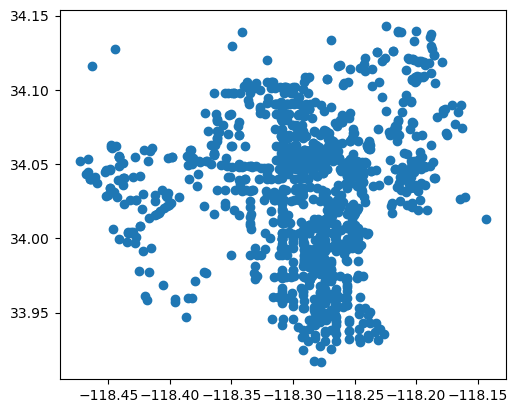

In [10]:
grocery_clean.plot()